In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Utils

In [ ]:
def imshow(*args, figsize=10, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1], cmap = 'gray')
        plt.axis('off')

In [ ]:
def plotImage(image, nth, title, row = 1):
  plt.subplot(row, 5, nth)
  plt.imshow(image, cmap='gray')
  plt.subplots_adjust(right=3.5, wspace=0.1)
  plt.title(title)

In [ ]:
def plot(image, nth, title):
  plt.subplot(1, 5, nth)
  plt.plot(image)
  plt.subplots_adjust(right=3.5, wspace=0.1)
  plt.title(title)

# Histogram functions

In [ ]:
# calculate histogram od an image by counting each amount of gray level in picture
def histogram(image):
  w, h = image.shape
  hist = [0.0] * 256
  for i in range(h):
    for j in range(w):
      pixel = image[i,j]
      hist[pixel] += 1

  # averaging
  for k in range(256):
    hist[k] /=(h*w)
  return np.array(hist)

In [ ]:
# Cumulative distribution function on histogram
def cfdCalculate(histogramArr):
  sum = [0.0] * len(histogramArr)
  for i in range(len(histogramArr)):
    for j in range(i+1):
      sum[i] += histogramArr[j]

  return sum

In [ ]:
def equlizedHistogram(image):
  hist = histogram(image)
  cfdSum = np.array(cfdCalculate(hist))
  # max gray level is 255
  newCdf = np.uint8(255 * cfdSum)
  m , n = image.shape
  newImage = np.zeros_like(image)

  # create a new image with updated cdf
  for i in range(n):
    for j in range(m):
      newImage[i, j] = newCdf[image[i, j]]

  return newImage


# Practice 1

In [ ]:
# convert image to n * n and change it back to 8bit scale
def quantize(image, n_bits):
    coeff = 2 ** 8 // 2 ** n_bits
    coeff2 = 2 ** 8 // (2 ** n_bits - 1)
    return (image // coeff) * coeff2

In [ ]:
# calculate mean square error
def MSE(x, y):
    return np.square(np.subtract(x, y)).mean()

## Practice 1.1.1

In [ ]:
# show each level
def drawLevel(image):
  # plot main image
  plotImage(image, 1, 'original')

  # histogram
  hisOrg = histogram(image)
  plot(hisOrg, 2, 'histogram')

  # equilized
  eqhisOrg = equlizedHistogram(image)
  plotImage(eqhisOrg, 3, 'equilized')

  # equilized histogram
  plot(histogram(eqhisOrg), 4, 'equilized histogram')

  return eqhisOrg

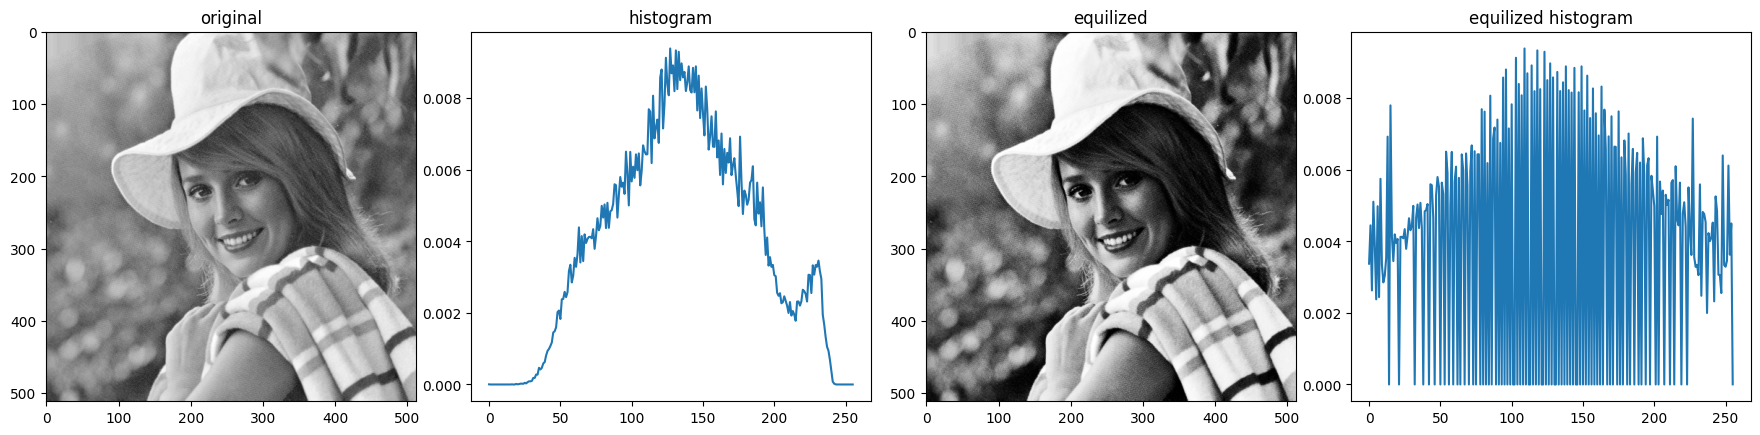

In [ ]:
# original
elaineImg = cv2.imread('Elaine.bmp', cv2.IMREAD_GRAYSCALE)
eqOrg = drawLevel(elaineImg)
plt.show()

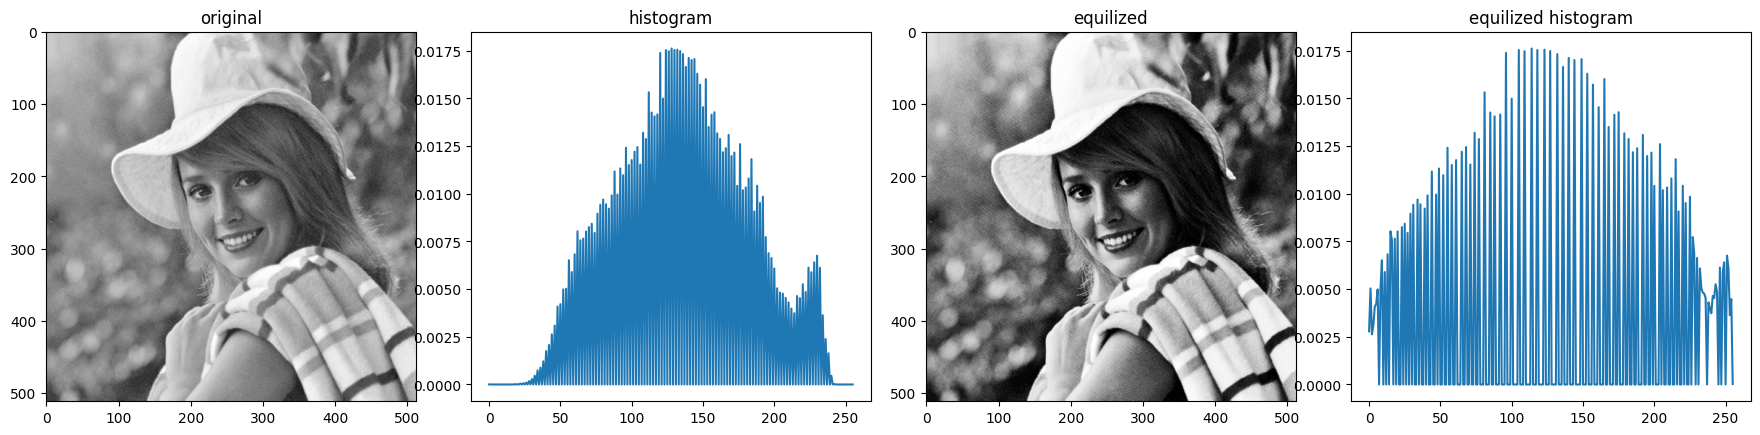

In [ ]:
# level 128
img128levels = quantize(elaineImg, 7)
eq128 = drawLevel(img128levels)
plt.show()

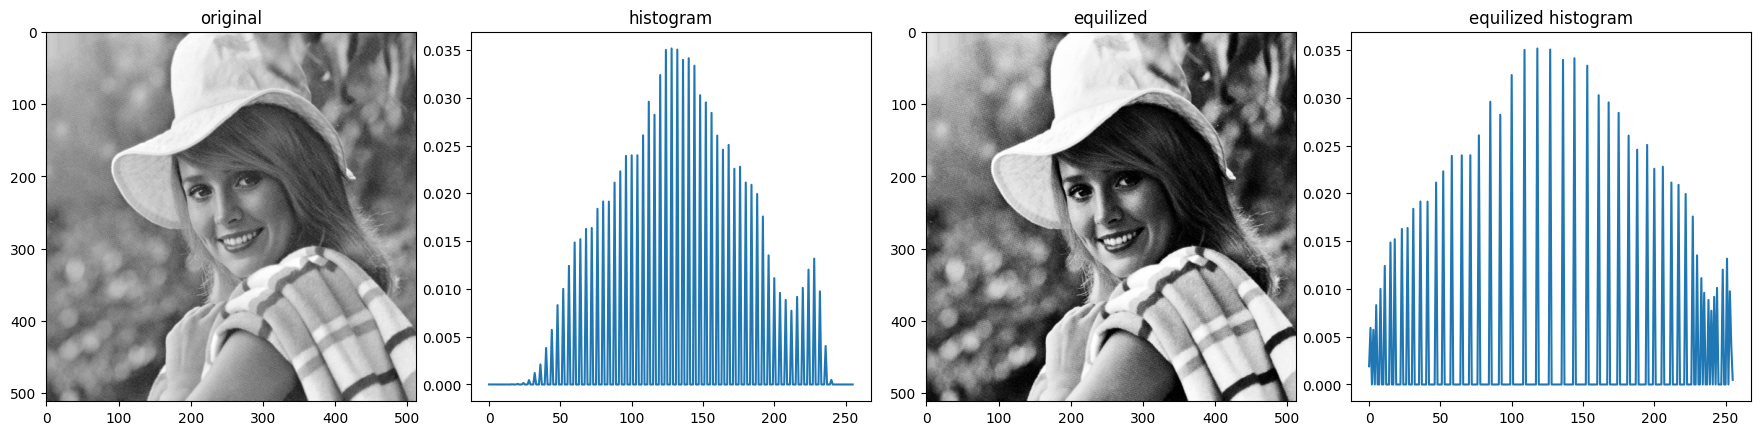

In [ ]:
# level 64
img64levels = quantize(elaineImg, 6)
eq64 = drawLevel(img64levels)
plt.show()

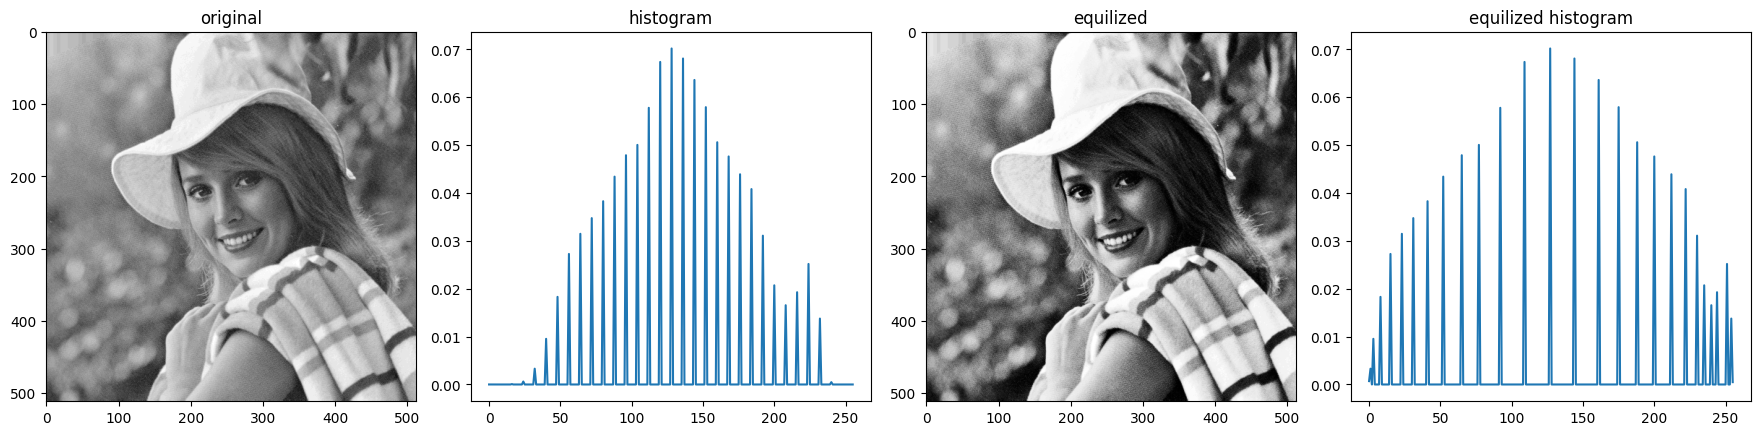

In [ ]:
# level 32
img32levels = quantize(elaineImg, 5)
eq32 = drawLevel(img32levels)
plt.show()

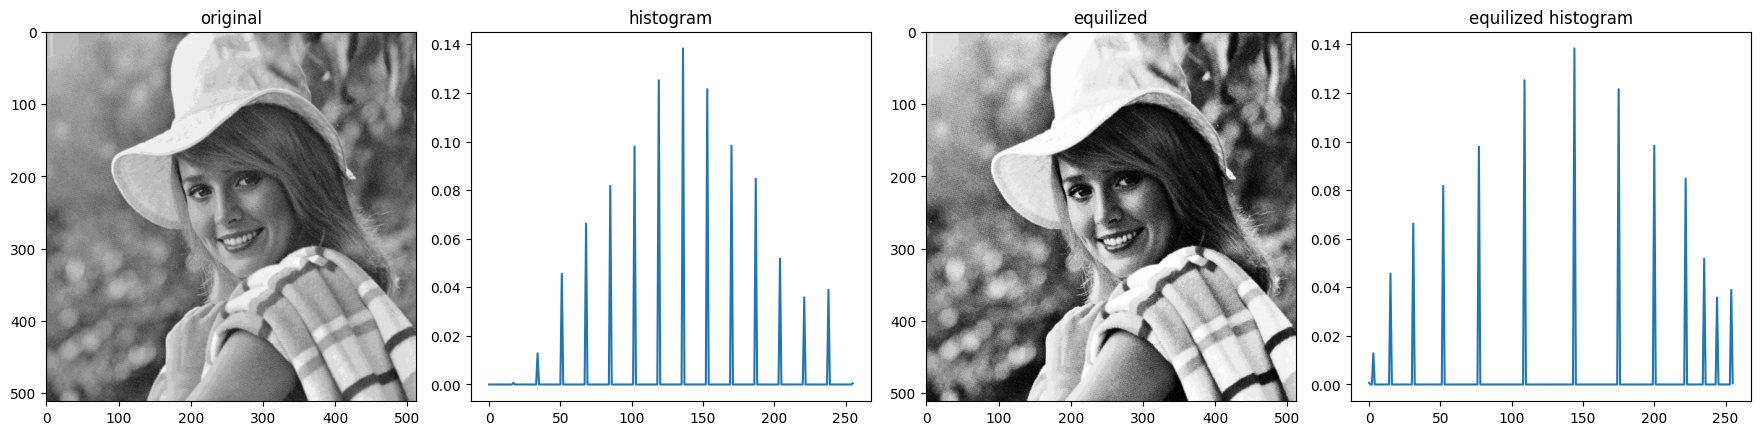

In [ ]:
# level 16
img16levels = quantize(elaineImg, 4)
eq16 = drawLevel(img16levels)
plt.show()

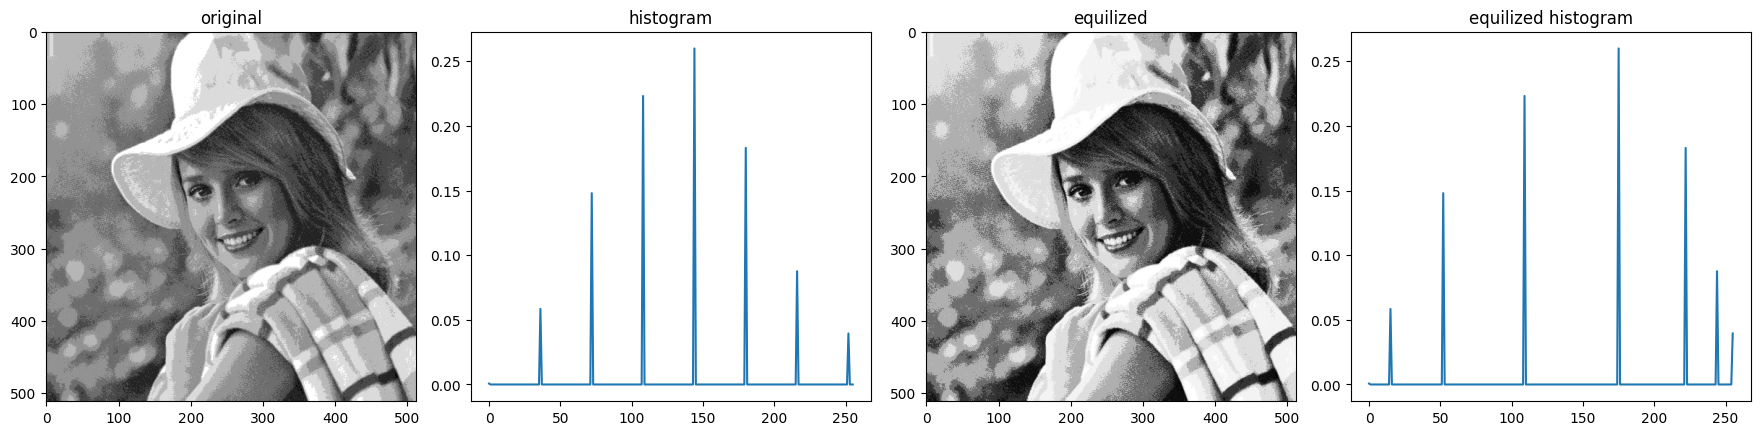

In [ ]:
# level 8
img8levels = quantize(elaineImg, 3)
eq8 = drawLevel(img8levels)
plt.show()

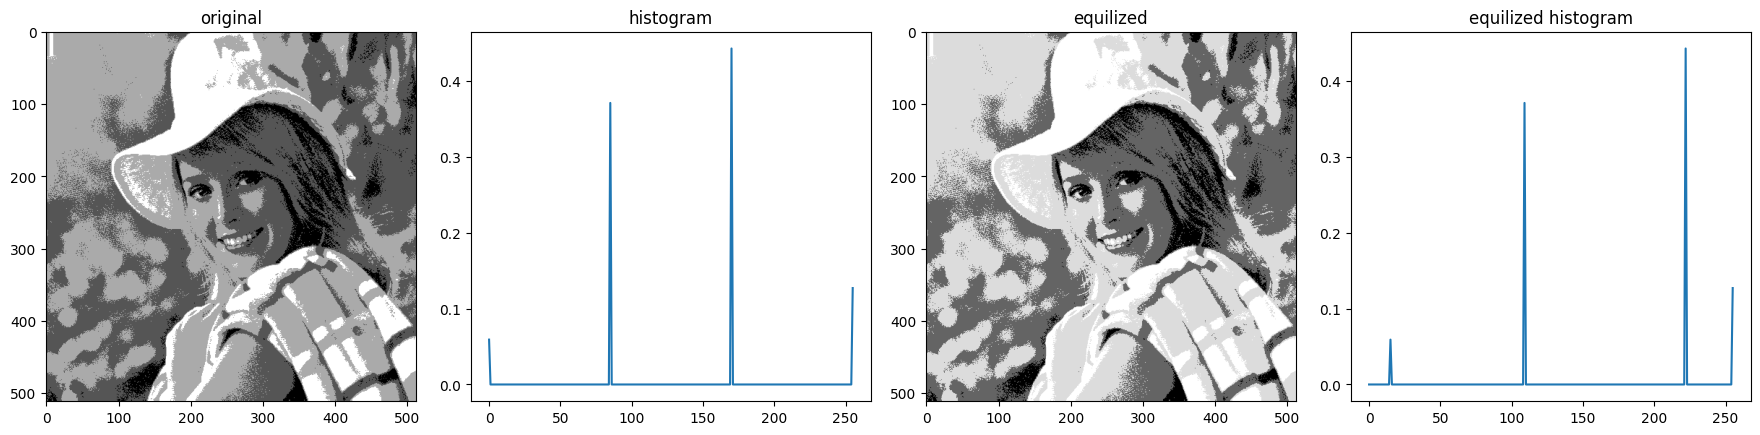

In [ ]:
# level 4
img4levels = quantize(elaineImg, 2)
eq4 = drawLevel(img4levels)
plt.show()

**comparison**

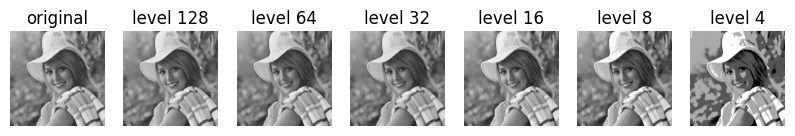

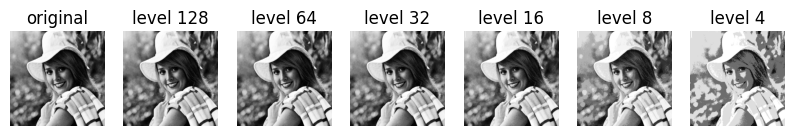

In [ ]:
imshow(elaineImg, img128levels, img64levels, img32levels, img16levels, img8levels, img4levels, title=['original', 'level 128', 'level 64', 'level 32', 'level 16', 'level 8', 'level 4'])
imshow(eqOrg, eq128, eq64, eq32, eq16, eq8, eq4, title=['original', 'level 128', 'level 64', 'level 32', 'level 16', 'level 8', 'level 4'])


In [ ]:
pd.DataFrame([('Without Histeq',
               MSE(elaineImg, img128levels),
               MSE(elaineImg, img64levels),
               MSE(elaineImg, img32levels),
               MSE(elaineImg, img16levels),
               MSE(elaineImg, img8levels),
               MSE(elaineImg, img4levels)),
            ('With Histeq',
               MSE(elaineImg, eq128),
               MSE(elaineImg, eq64),
               MSE(elaineImg, eq32),
               MSE(elaineImg, eq16),
               MSE(elaineImg, eq8),
               MSE(elaineImg, eq4))],

              columns=('Levels', '128', '64', '32', '16', '8', '4'))


Levels         128          64          32          16           8  \
0  Without Histeq    0.509254    3.468834   17.381859   32.774803   76.570976   
1     With Histeq  102.832993  106.985451  106.654507  108.296638  108.791664   

            4  
0  102.684330  
1  109.074158

## Practice 1.1.3

In [ ]:
# convert image to n * n
def quantizeNoScale(image, n_bits):
    coeff = 2 ** 8 // 2 ** n_bits
    return (image // coeff)

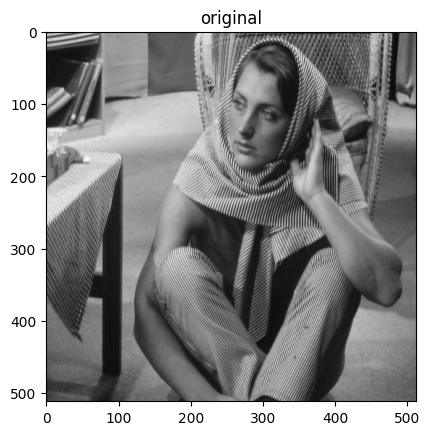

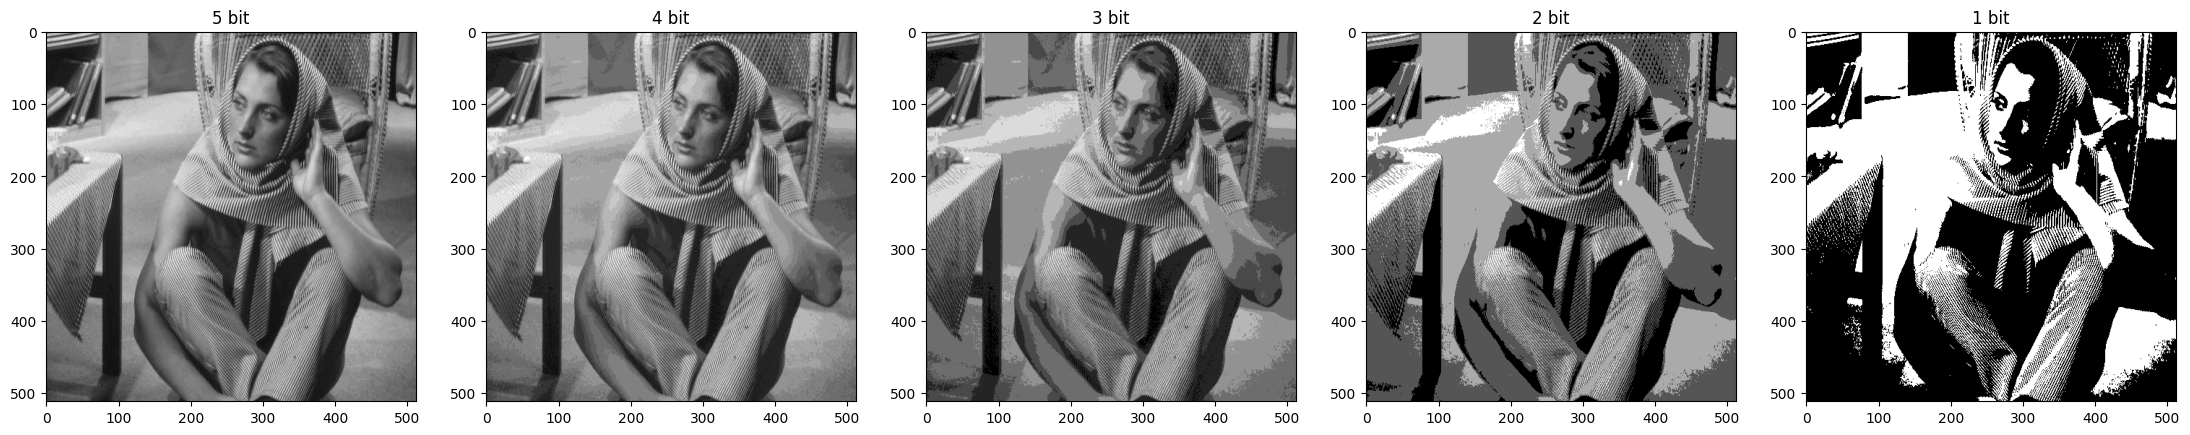

In [ ]:
# original
barbaraImg = cv2.imread('Barbara.bmp', cv2.IMREAD_GRAYSCALE)
plotImage(barbaraImg, 1, 'original')
plt.show()

# 5 bit
img5 = quantizeNoScale(barbaraImg, 5)
plotImage(img5, 1, '5 bit')

# 4 bit
img4 = quantizeNoScale(barbaraImg, 4)
plotImage(img4, 2, '4 bit')

# 3 bit
img3 = quantizeNoScale(barbaraImg, 3)
plotImage(img3, 3, '3 bit')

# 2 bit
img2 = quantizeNoScale(barbaraImg, 2)
plotImage(img2, 4, '2 bit')

# 1 bit
img1 = quantizeNoScale(barbaraImg, 1)
plotImage(img1, 5, '1 bit')